## STEP 1: is importing all the necessary Libraries
We will be using Pandas, Numoy, Seaborn, and Matplotlib


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
# We will now load the data set

data = pd.read_csv("data/GenZ_DatingApp_Data.csv")

In [8]:
# Questions for Students
# 1. Are there any duplicate rows? If yes, why might duplicates exist in this dataset?


#Using the duplicated() function to check for duplicates
duplicates = data.duplicated()
print (duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [9]:
# Based on the output, there are no duplicates in the dataset

In [13]:
# 2. Are there inconsistencies in categorical values (e.g., spelling variations, case sensitivity)?

#Checking the data types
print(data.dtypes)

# Converting the object data types to Categorys
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

# Converting the Satisfication column to category

data["Satisfaction"] = data["Satisfaction"].astype('category')

User_ID                       int64
Age                           int64
Gender                     category
Location                   category
Education                  category
Occupation                 category
Primary_App                category
Secondary_Apps             category
Usage_Frequency            category
Daily_Usage_Time           category
Reason_for_Using           category
Satisfaction                  int64
Challenges                 category
Desired_Features           category
Preferred_Communication    category
Partner_Priorities         category
dtype: object


In [17]:
for col in data.select_dtypes(include="category"):
    print(f"Unique values in {col}:")
    print(data[col].unique(), "\n")


Unique values in Gender:
['Non-binary', 'Female', 'Male']
Categories (3, object): ['Female', 'Male', 'Non-binary'] 

Unique values in Location:
['Bangalore', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai', 'Pune', 'Hyderabad']
Categories (7, object): ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune'] 

Unique values in Education:
['Undergraduate', 'Graduate', 'Postgraduate']
Categories (3, object): ['Graduate', 'Postgraduate', 'Undergraduate'] 

Unique values in Occupation:
['Freelancer', 'Part-time Job', 'Intern', 'Full-time Job', 'Student']
Categories (5, object): ['Freelancer', 'Full-time Job', 'Intern', 'Part-time Job', 'Student'] 

Unique values in Primary_App:
['Hinge', NaN, 'OkCupid', 'Tinder', 'Bumble']
Categories (4, object): ['Bumble', 'Hinge', 'OkCupid', 'Tinder'] 

Unique values in Secondary_Apps:
['Hinge', 'OkCupid', NaN, 'Tinder', 'Bumble']
Categories (4, object): ['Bumble', 'Hinge', 'OkCupid', 'Tinder'] 

Unique values in Usage_Frequency:
['Monthly', 'W

In [ ]:
# From the output of the data set using the Unqiue values function, there are no inconsistencies in the categorical values.


In [22]:
# Checking if there are any missing values in the dataset

print(data.isnull().sum())

User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64


In [19]:
# From the above results, there 107 Primary_App missing values, 114 Secondary_Apps missing values and 117 Challenges Missing values.

In [20]:
# 3. What should we do if a column has too many missing values?

# There are different approaches on dealing with Missing values depending on the type of the data set.
# 1. Using the Mean, Median or Mode to fill in the missing values. If the data set is a numeric, then we could use the mean and median to fill the missing values.
# If the data set is a categorical data set, we could use the mode to fill in the missing values.
# 2. Dropping the missing values
# 3. Using the KNN imputer to fill in the missing values
# 4. Using the Forward and Backward fill in the missing values

In [21]:
# Based on the data type, our dta set is a categorical data set, we could use the mode to fill in the missing values.

data["Primary_App"] = data["Primary_App"].fillna(data["Primary_App"].mode()[0])
data["Secondary_Apps"]= data["Secondary_Apps"].fillna(data["Secondary_Apps"].mode()[0])
data["Challenges"]= data["Challenges"].fillna(data["Challenges"].mode()[0])

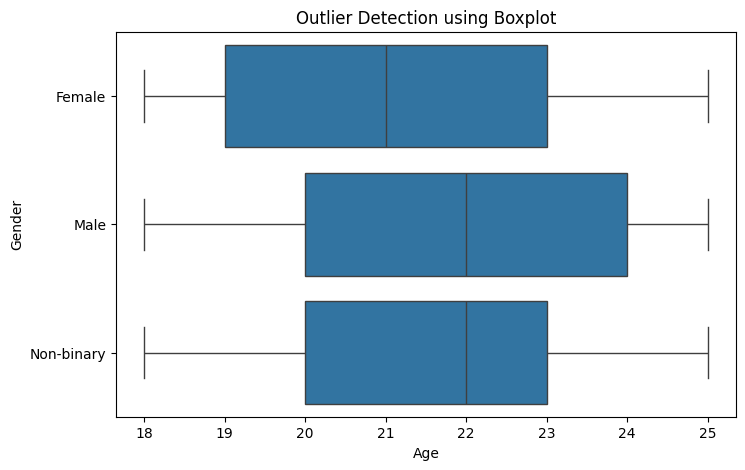

In [24]:
# Checking for outliers using Boxplots

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y="Gender", x="Age")
plt.title("Outlier Detection using Boxplot")
plt.show()

In [28]:
# Checking outliers using the IQR Method

Q1 = data["Age"].quantile(0.25)  # First quartile (25%)
Q3 = data["Age"].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data["Age"] < lower_bound) | (data["Age"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Display outlier rows
outliers

Number of outliers: 0


,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities


In [ ]:
# 4. From the output, there are no outliers in the numerical columns.